In [65]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [104]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [66]:
#import dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [67]:
# Removing the last 2 rows as the station and date value is missing. Date value seems to be a important feature for our analysis.
df=df[~df['station'].isna()].reset_index(drop=True)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [68]:
df.head().T

,0,1,2,3,4
station,1.0,2.0,3.0,4.0,5.0
Date,30-06-2013,30-06-2013,30-06-2013,30-06-2013,30-06-2013
Present_Tmax,28.7,31.9,31.6,32.0,31.4
Present_Tmin,21.4,21.6,23.3,23.4,21.9
LDAPS_RHmin,58.255688,52.263397,48.690479,58.239788,56.174095
LDAPS_RHmax,91.116364,90.604721,83.973587,96.483688,90.155128
LDAPS_Tmax_lapse,28.074101,29.850689,30.091292,29.704629,29.113934
LDAPS_Tmin_lapse,23.006936,24.035009,24.565633,23.326177,23.48648
LDAPS_WS,6.818887,5.69189,6.138224,5.65005,5.735004
LDAPS_LH,69.451805,51.937448,20.57305,65.727144,107.965535


In [69]:
# dropping columns that are not required for our analysis
df.drop(columns=['station', 'lat', 'lon'],inplace=True)
df

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7
7746,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1
7747,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1
7748,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8


In [70]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7750 entries, 0 to 7749
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7750 non-null   object 
 1   Present_Tmax      7680 non-null   float64
 2   Present_Tmin      7680 non-null   float64
 3   LDAPS_RHmin       7675 non-null   float64
 4   LDAPS_RHmax       7675 non-null   float64
 5   LDAPS_Tmax_lapse  7675 non-null   float64
 6   LDAPS_Tmin_lapse  7675 non-null   float64
 7   LDAPS_WS          7675 non-null   float64
 8   LDAPS_LH          7675 non-null   float64
 9   LDAPS_CC1         7675 non-null   float64
 10  LDAPS_CC2         7675 non-null   float64
 11  LDAPS_CC3         7675 non-null   float64
 12  LDAPS_CC4         7675 non-null   float64
 13  LDAPS_PPT1        7675 non-null   float64
 14  LDAPS_PPT2        7675 non-null   float64
 15  LDAPS_PPT3        7675 non-null   float64
 16  LDAPS_PPT4        7675 non-null   float64


In [71]:
# we have to predict next day minimum and maximum temperature so we will remove the rows where theses values are null, 
# as we wont be able to evaluate our model against the null values.
df=df[~df['Next_Tmax'].isna()].reset_index(drop=True)
df

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7
7719,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1
7720,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1
7721,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7723 non-null   object 
 1   Present_Tmax      7663 non-null   float64
 2   Present_Tmin      7663 non-null   float64
 3   LDAPS_RHmin       7648 non-null   float64
 4   LDAPS_RHmax       7648 non-null   float64
 5   LDAPS_Tmax_lapse  7648 non-null   float64
 6   LDAPS_Tmin_lapse  7648 non-null   float64
 7   LDAPS_WS          7648 non-null   float64
 8   LDAPS_LH          7648 non-null   float64
 9   LDAPS_CC1         7648 non-null   float64
 10  LDAPS_CC2         7648 non-null   float64
 11  LDAPS_CC3         7648 non-null   float64
 12  LDAPS_CC4         7648 non-null   float64
 13  LDAPS_PPT1        7648 non-null   float64
 14  LDAPS_PPT2        7648 non-null   float64
 15  LDAPS_PPT3        7648 non-null   float64
 16  LDAPS_PPT4        7648 non-null   float64


### Exploratory Data

In [73]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

30-06-2013    25
21-07-2015    25
18-07-2016    25
17-07-2016    25
16-07-2016    25
              ..
09-07-2017    24
11-08-2013    24
03-08-2013    24
31-07-2015    24
23-08-2017    23
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    143
23.5    143
23.3    140
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


51.810596    2
71.658089    2
77.030350    2
58.255688    1
40.471619    1
            ..
51.072369    1
52.174259    1
55.354607    1
57.535545    1
22.933014    1
Name: LDAPS_RHmin, Length: 7645, dtype: int64


96.058418    2
88.876610    2
92.531029    2
88.938194    2
85.863731    2
            ..
96.233223    1
92.978004    1
96.280243    1
97.245651    1
77.243744    1
Name: LDAPS_RHmax, Length: 7637, dt

In [74]:
#converting date column data type to datatime data type.
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7
7719,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1
7720,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1
7721,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8


In [75]:
#extracting month from date column as month could be an important variable for determining target variable.
df['month']=df['Date'].dt.month
df

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month
0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,6
1,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,6
2,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,6
3,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,6
4,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7,8
7719,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1,8
7720,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1,8
7721,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8,8


In [76]:
#extracting year from date column as year could be an important variable for determining target variable.
df['year']=df['Date'].dt.year
df

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year
0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7,8,2017
7719,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1,8,2017
7720,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1,8,2017
7721,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8,8,2017


In [77]:
#dropping column Date as year column is also given, so we will use year column in our prediction.
df.drop(columns=['Date'],inplace=True)
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7,8,2017
7719,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1,8,2017
7720,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1,8,2017
7721,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8,8,2017


In [78]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Present_Tmax,7663.0,29.769816,2.967709,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7663.0,23.225316,2.410223,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7648.0,56.740769,14.642985,19.794666,45.962741,55.017689,67.153889,98.524734
LDAPS_RHmax,7648.0,88.371467,7.190904,58.936283,84.213987,89.792492,93.742725,100.000153
LDAPS_Tmax_lapse,7648.0,29.616654,2.942035,17.624954,27.675512,29.705437,31.710469,38.542255
LDAPS_Tmin_lapse,7648.0,23.512217,2.342287,14.272646,22.089246,23.758249,25.153179,29.619342
LDAPS_WS,7648.0,7.095360,2.175671,2.882580,5.679477,6.547838,8.029525,21.857621
LDAPS_LH,7648.0,62.458809,33.669420,-13.603212,37.227848,56.854134,84.222469,213.414006
LDAPS_CC1,7648.0,0.368452,0.262239,0.000000,0.146557,0.315185,0.573938,0.967277
LDAPS_CC2,7648.0,0.355763,0.257826,0.000000,0.140627,0.311891,0.557393,0.968353


#### Univariate Analysis

In [79]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'year'],
      dtype='object')

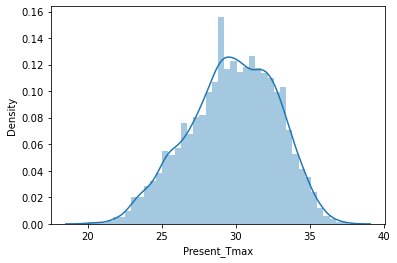

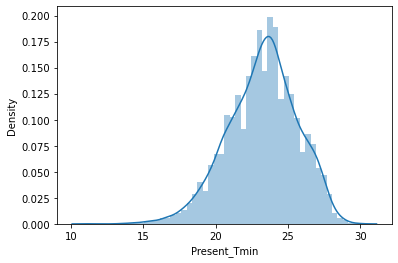

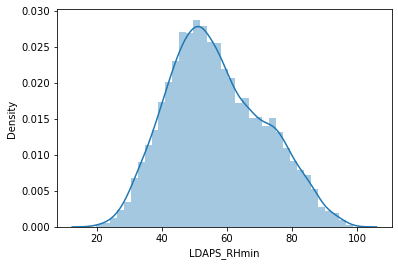

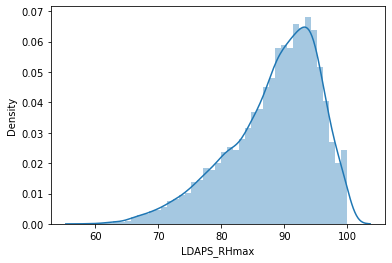

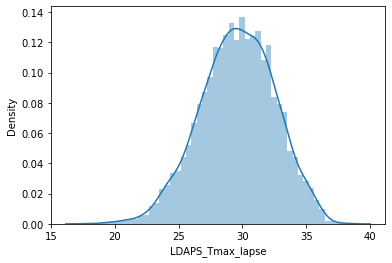

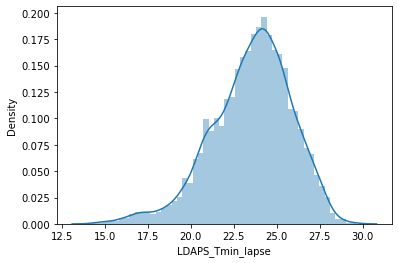

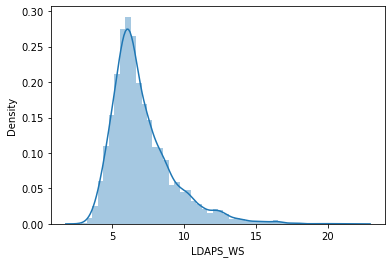

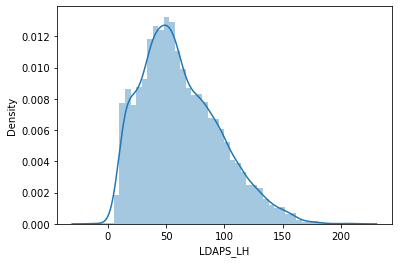

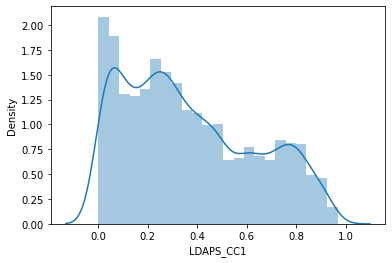

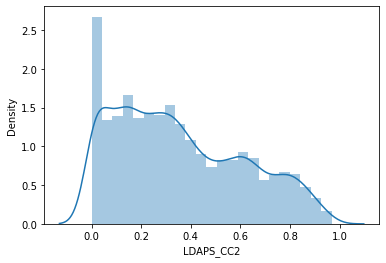

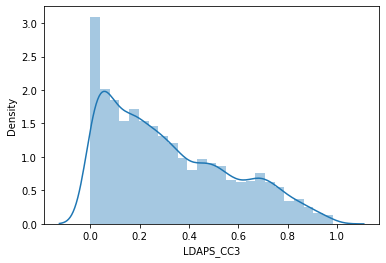

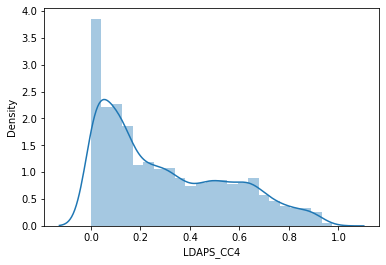

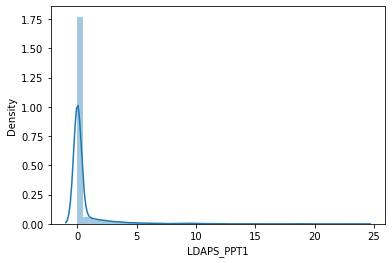

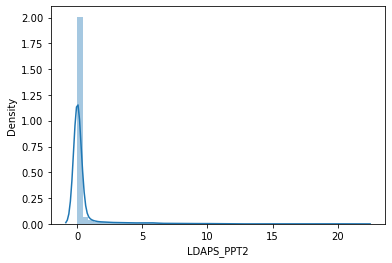

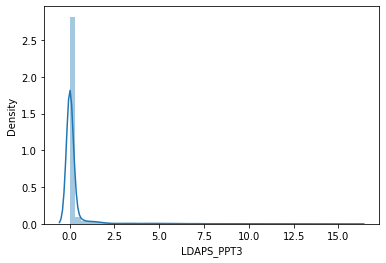

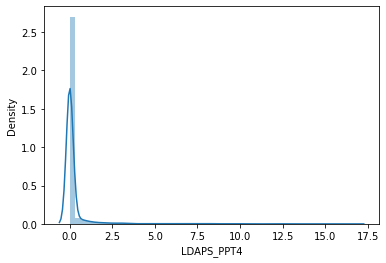

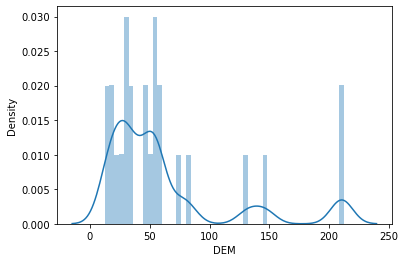

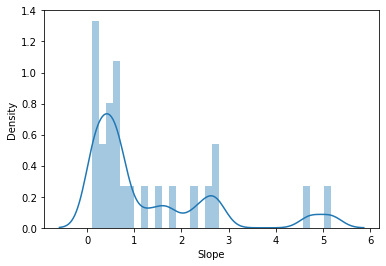

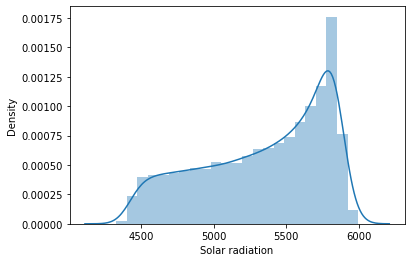

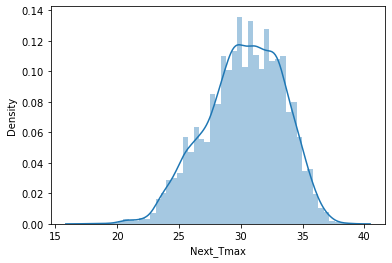

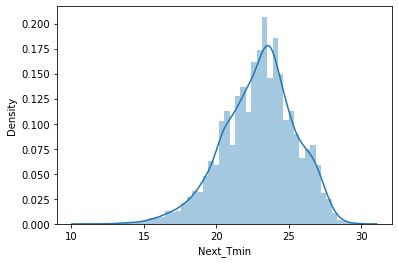

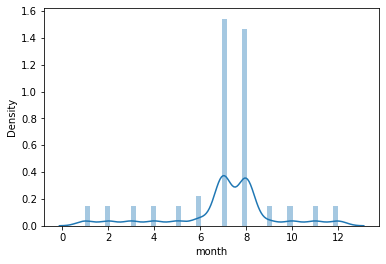

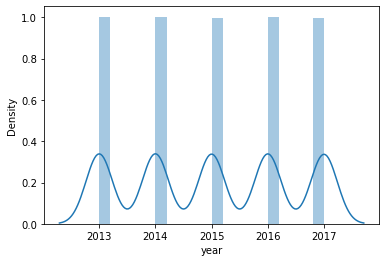

In [80]:
#Display distribution for all columns.
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

#### Filling null values

In [81]:
# Fill the na values of numeric type columns with mean which are closer to normal distribution
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [82]:
# Fill the na values of numeric type columns with median which are not similar to normal distribution
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7723 non-null   float64
 1   Present_Tmin      7723 non-null   float64
 2   LDAPS_RHmin       7723 non-null   float64
 3   LDAPS_RHmax       7723 non-null   float64
 4   LDAPS_Tmax_lapse  7723 non-null   float64
 5   LDAPS_Tmin_lapse  7723 non-null   float64
 6   LDAPS_WS          7723 non-null   float64
 7   LDAPS_LH          7723 non-null   float64
 8   LDAPS_CC1         7723 non-null   float64
 9   LDAPS_CC2         7723 non-null   float64
 10  LDAPS_CC3         7723 non-null   float64
 11  LDAPS_CC4         7723 non-null   float64
 12  LDAPS_PPT1        7723 non-null   float64
 13  LDAPS_PPT2        7723 non-null   float64
 14  LDAPS_PPT3        7723 non-null   float64
 15  LDAPS_PPT4        7723 non-null   float64
 16  DEM               7723 non-null   float64


#### Bivariate Analysis

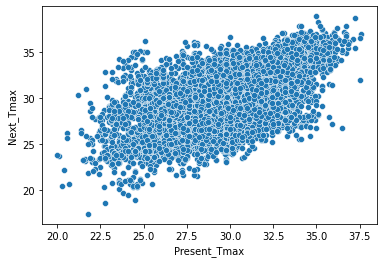

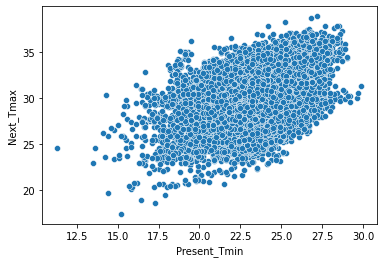

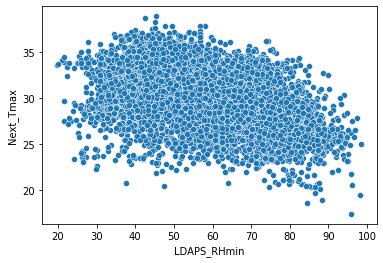

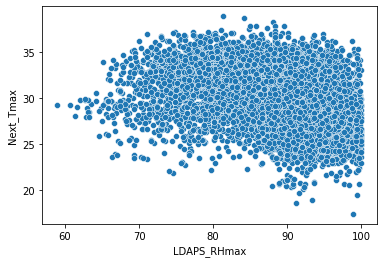

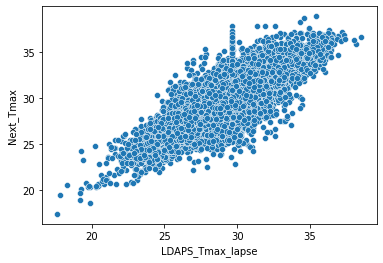

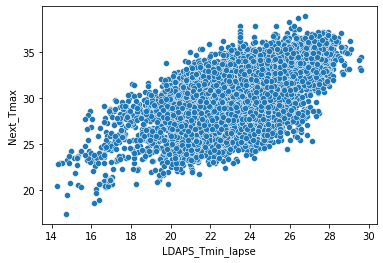

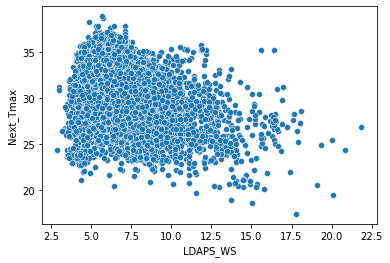

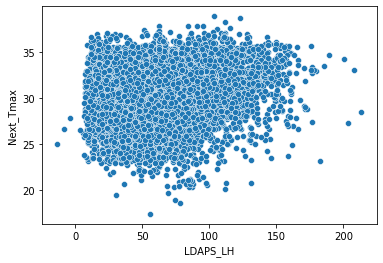

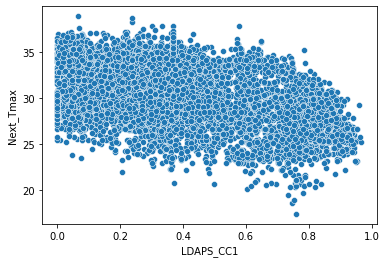

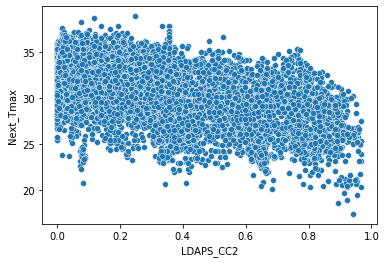

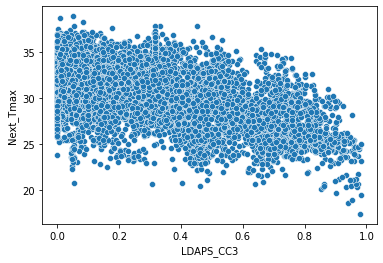

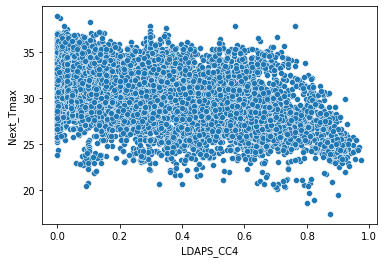

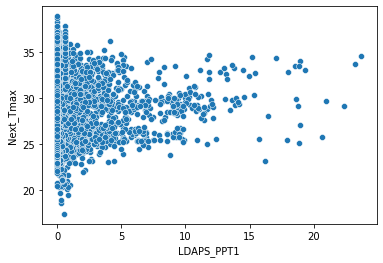

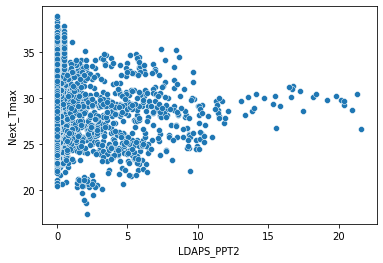

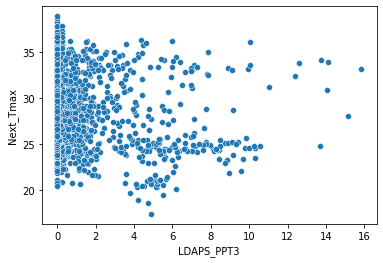

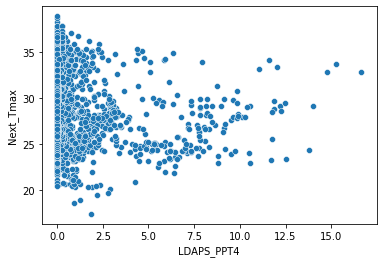

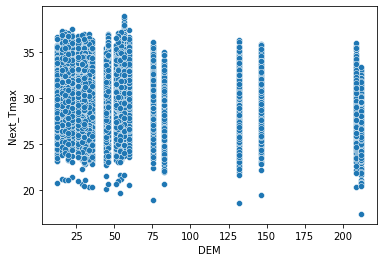

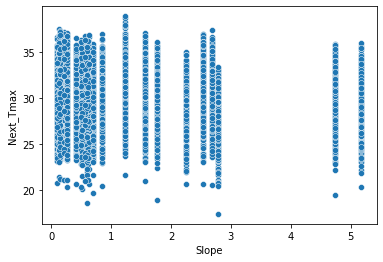

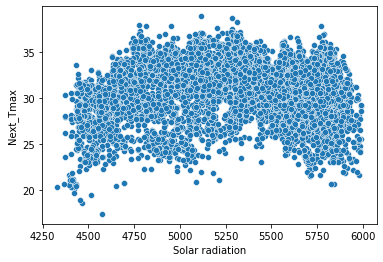

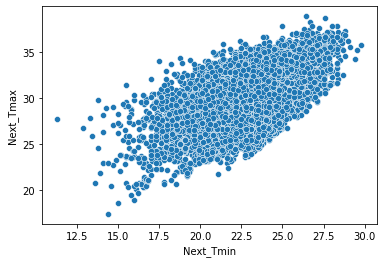

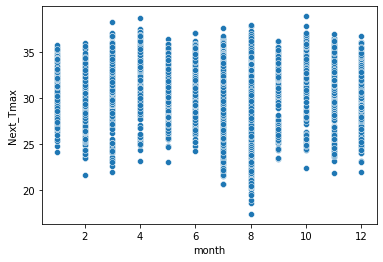

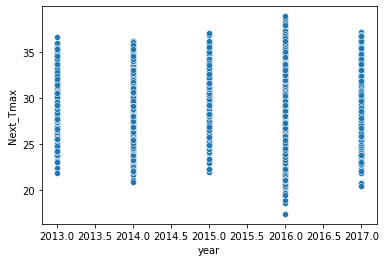

In [90]:
# for all columns check how the Next_Tmax vary
for i in df.columns:
    if i != 'Next_Tmax':
        sns.scatterplot(y=df['Next_Tmax'],x=df[i])
        plt.show()

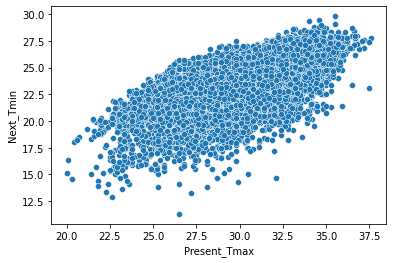

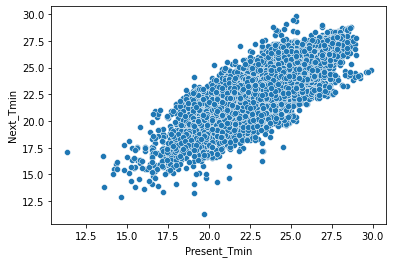

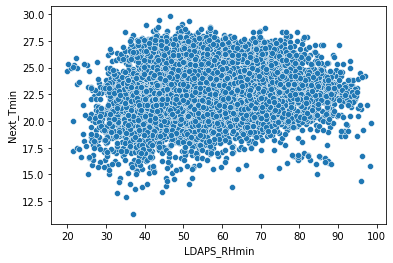

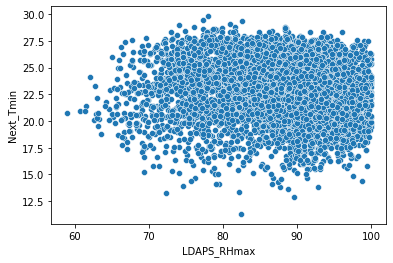

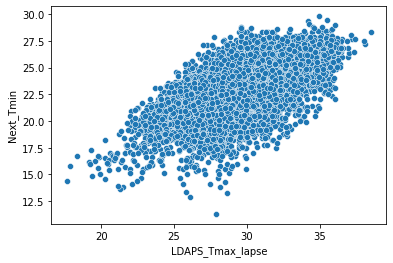

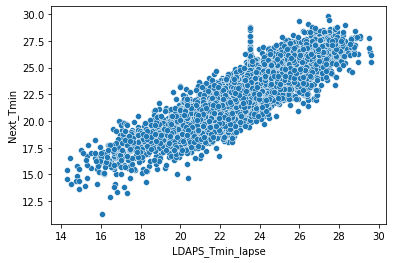

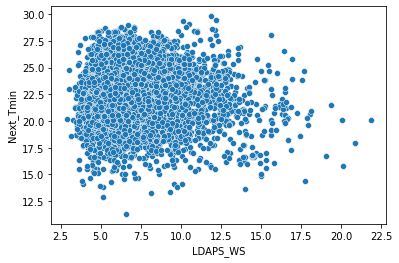

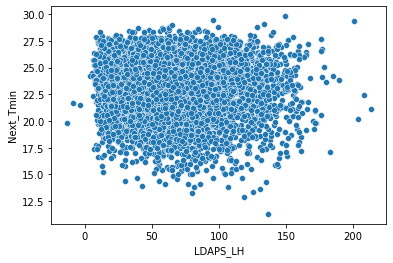

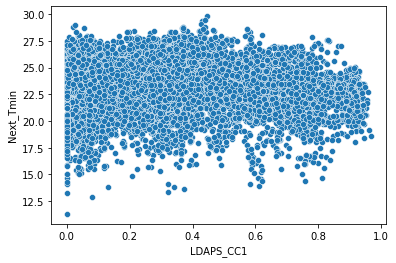

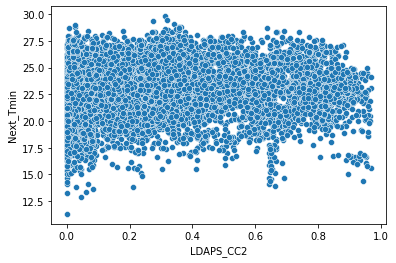

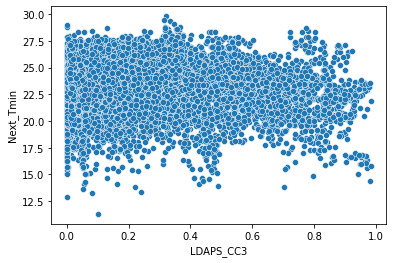

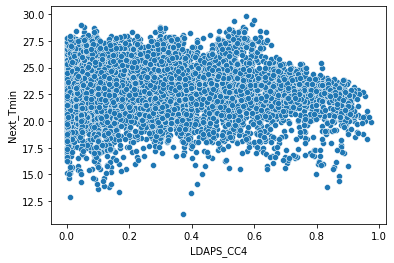

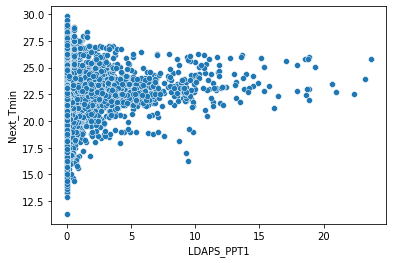

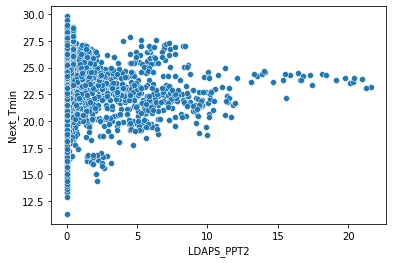

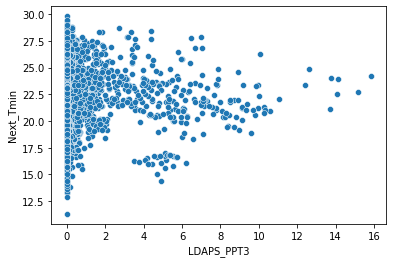

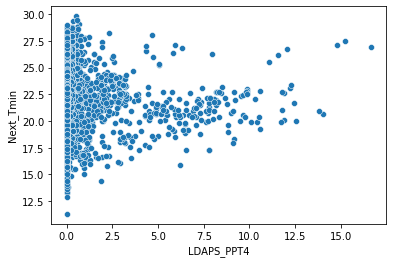

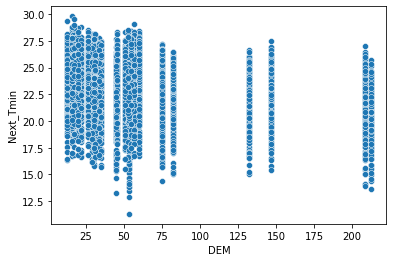

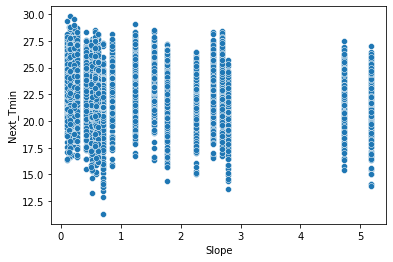

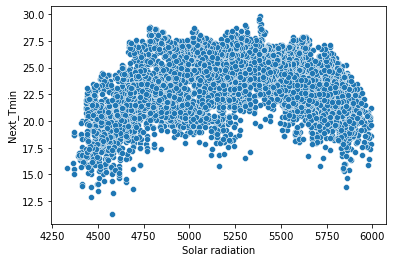

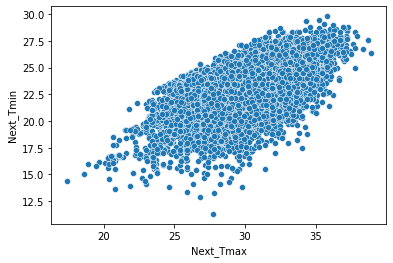

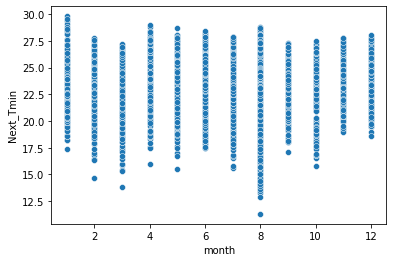

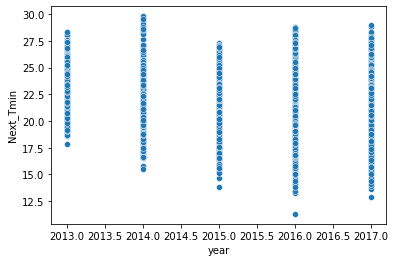

In [89]:
# for all columns check how the Next_Tmin vary
for i in df.columns:
    if i != 'Next_Tmin':
        sns.scatterplot(y=df['Next_Tmin'],x=df[i])
        plt.show()

#### Multivariate analysis

In [97]:
df.corr()[df.corr()<1].max().sort_values(ascending=False)

Next_Tmin           0.881342
LDAPS_Tmin_lapse    0.881342
LDAPS_Tmax_lapse    0.828267
Next_Tmax           0.828267
Present_Tmin        0.796415
LDAPS_CC4           0.793536
LDAPS_CC3           0.793536
DEM                 0.783366
Slope               0.783366
LDAPS_CC1           0.779291
LDAPS_CC2           0.779291
LDAPS_RHmin         0.744980
Present_Tmax        0.623175
LDAPS_RHmax         0.578708
LDAPS_PPT2          0.479962
LDAPS_PPT1          0.447020
LDAPS_PPT4          0.375987
LDAPS_PPT3          0.338376
LDAPS_WS            0.291812
Solar radiation     0.242477
LDAPS_LH            0.237706
year                0.109188
month               0.035866
dtype: float64

In [98]:
df.corr()[df.corr()<1].min().sort_values()

LDAPS_RHmin        -0.568968
LDAPS_Tmax_lapse   -0.568968
LDAPS_CC3          -0.543809
LDAPS_CC2          -0.526132
Next_Tmax          -0.518904
LDAPS_CC1          -0.456087
LDAPS_CC4          -0.449921
LDAPS_RHmax        -0.377209
LDAPS_WS           -0.348707
Present_Tmax       -0.313537
month              -0.309456
Solar radiation    -0.309456
LDAPS_LH           -0.265604
DEM                -0.252359
Present_Tmin       -0.252359
Next_Tmin          -0.249255
LDAPS_PPT2         -0.249063
LDAPS_PPT3         -0.202819
LDAPS_Tmin_lapse   -0.196883
Slope              -0.186902
LDAPS_PPT4         -0.186663
year               -0.142922
LDAPS_PPT1         -0.124823
dtype: float64

<AxesSubplot:>

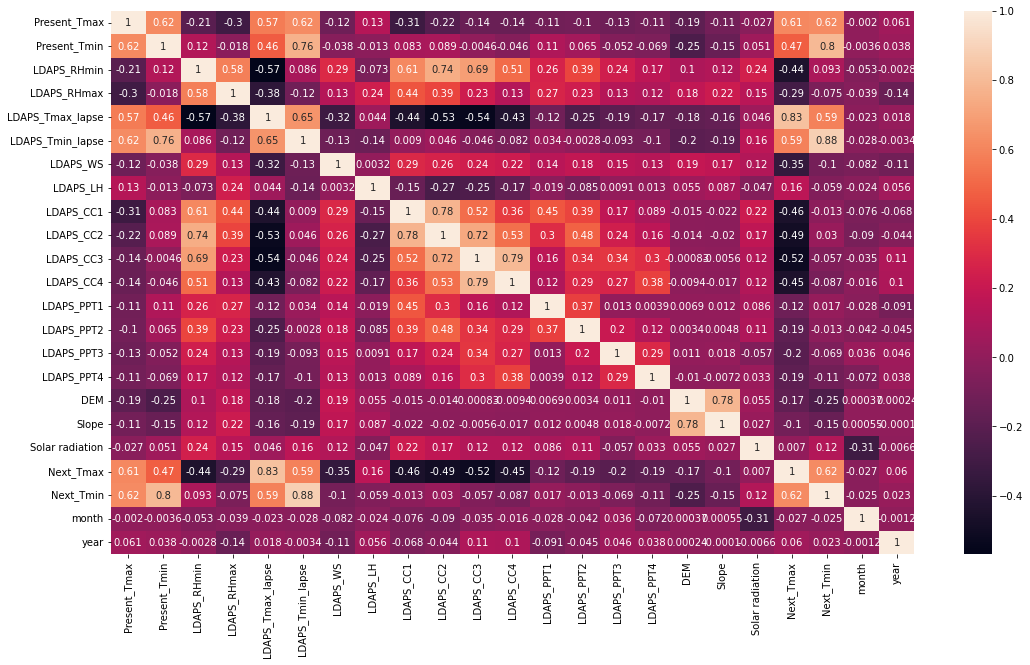

In [91]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering (Target Variable- Next_Tmax)

In [99]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'year'],
      dtype='object')

In [137]:
# Create X with all independent variables
X=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'month', 'year']]
X

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,month,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,6,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,6,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,6,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,6,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,8,2017
7719,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,8,2017
7720,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,8,2017
7721,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,8,2017


In [205]:
y=df['Next_Tmax']
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7718    27.6
7719    28.0
7720    28.3
7721    28.6
7722    27.8
Name: Next_Tmax, Length: 7723, dtype: float64

In [139]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
4,753.084463,LDAPS_Tmax_lapse
20,744.285889,year
5,726.093818,LDAPS_Tmin_lapse
3,333.582282,LDAPS_RHmax
1,290.412450,Present_Tmin
0,285.474154,Present_Tmax
18,209.321971,Solar radiation
2,101.375024,LDAPS_RHmin
9,15.342059,LDAPS_CC2
6,14.756780,LDAPS_WS


In [140]:
#Dropping column LDAPS_Tmax_lapse as its vif value is very high
X.drop(columns=['LDAPS_Tmax_lapse'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
19,638.812576,year
4,348.242302,LDAPS_Tmin_lapse
3,330.338613,LDAPS_RHmax
1,290.404232,Present_Tmin
0,285.164203,Present_Tmax
17,199.026007,Solar radiation
2,67.170790,LDAPS_RHmin
8,14.975231,LDAPS_CC2
5,14.590740,LDAPS_WS
9,13.653292,LDAPS_CC3


In [141]:
#Dropping column year as its vif value is very high
X.drop(columns=['year'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
4,346.567474,LDAPS_Tmin_lapse
1,290.006332,Present_Tmin
0,257.229790,Present_Tmax
3,184.482249,LDAPS_RHmax
17,153.354369,Solar radiation
2,62.482946,LDAPS_RHmin
8,14.970196,LDAPS_CC2
5,14.128474,LDAPS_WS
9,13.586932,LDAPS_CC3
18,11.468548,month


In [142]:
#Dropping column LDAPS_Tmin_lapse as its vif value is very high
X.drop(columns=['LDAPS_Tmin_lapse'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,212.296063,Present_Tmax
1,202.286341,Present_Tmin
3,184.067982,LDAPS_RHmax
16,144.244590,Solar radiation
2,59.382476,LDAPS_RHmin
7,14.969698,LDAPS_CC2
4,13.742211,LDAPS_WS
8,13.277432,LDAPS_CC3
17,11.462352,month
6,10.318986,LDAPS_CC1


In [143]:
#Dropping column Present_Tmax as its vif value is very high
X.drop(columns=['Present_Tmax'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
2,183.454045,LDAPS_RHmax
15,130.114567,Solar radiation
0,83.596422,Present_Tmin
1,55.971521,LDAPS_RHmin
6,14.867129,LDAPS_CC2
3,13.672249,LDAPS_WS
7,12.812372,LDAPS_CC3
16,11.318355,month
5,9.228826,LDAPS_CC1
8,7.106701,LDAPS_CC4


In [144]:
#Dropping column LDAPS_RHmax as its vif value is very high
X.drop(columns=['LDAPS_RHmax'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
14,85.395565,Solar radiation
0,77.564534,Present_Tmin
1,48.647597,LDAPS_RHmin
5,14.838089,LDAPS_CC2
2,13.672049,LDAPS_WS
6,12.691678,LDAPS_CC3
15,10.364311,month
4,9.191740,LDAPS_CC1
7,7.077745,LDAPS_CC4
12,6.296041,DEM


In [145]:
#Dropping column Solar radiation as its vif value is very high
X.drop(columns=['Solar radiation'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,45.689486,LDAPS_RHmin
0,33.320374,Present_Tmin
5,14.664946,LDAPS_CC2
2,13.160992,LDAPS_WS
6,12.641368,LDAPS_CC3
14,10.364311,month
4,9.112141,LDAPS_CC1
7,7.020255,LDAPS_CC4
12,6.032165,DEM
3,5.159133,LDAPS_LH


In [146]:
#Dropping column LDAPS_RHmin as its vif value is very high
X.drop(columns=['LDAPS_RHmin'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,23.403666,Present_Tmin
4,13.178357,LDAPS_CC2
1,12.967722,LDAPS_WS
5,11.611466,LDAPS_CC3
13,10.307912,month
3,9.043400,LDAPS_CC1
6,7.020022,LDAPS_CC4
11,5.990784,DEM
2,4.860831,LDAPS_LH
12,4.800955,Slope


In [147]:
#Dropping column Present_Tmin as its vif value is very high
X.drop(columns=['Present_Tmin'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
3,12.795175,LDAPS_CC2
4,11.607120,LDAPS_CC3
0,9.982766,LDAPS_WS
2,9.043397,LDAPS_CC1
5,7.020012,LDAPS_CC4
12,6.574009,month
10,5.980556,DEM
11,4.800568,Slope
1,4.134023,LDAPS_LH
7,1.539939,LDAPS_PPT2


In [148]:
#Dropping column LDAPS_CC2 as its vif value is very high
X.drop(columns=['LDAPS_CC2'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,9.915810,LDAPS_WS
3,9.164095,LDAPS_CC3
4,6.987415,LDAPS_CC4
11,6.565717,month
9,5.980434,DEM
2,5.292132,LDAPS_CC1
10,4.800566,Slope
1,4.093976,LDAPS_LH
5,1.484595,LDAPS_PPT1
6,1.428310,LDAPS_PPT2


In [149]:
X

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
0,6.818887,69.451805,0.233947,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,6
1,5.691890,51.937448,0.225508,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,6
2,6.138224,20.573050,0.209344,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,6
3,5.650050,65.727144,0.216372,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,6
4,5.735004,107.965535,0.151407,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7718,6.603253,9.614074,0.052902,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,8
7719,5.768083,82.146707,0.066461,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,8
7720,6.148918,72.058294,0.030034,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,8
7721,6.542819,47.241457,0.035874,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,8


In [150]:
#Feature scaling of X
ss=StandardScaler()

In [154]:
# Apply standard scaler on only relevant columns
X=pd.DataFrame(ss.fit_transform(X[:]),columns=X.columns)
X

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
0,-0.127705,0.208725,-0.515449,-0.628695,-0.664909,-0.306878,-0.277399,-0.241582,-0.225506,2.769916,1.113817,-0.482333
1,-0.648272,-0.314039,-0.547790,-0.637752,-0.677569,-0.306878,-0.277399,-0.241582,-0.225506,-0.315833,-0.543011,-0.482333
2,-0.442107,-1.250196,-0.609736,-0.458268,-0.620624,-0.306878,-0.277399,-0.241582,-0.225506,-0.526781,-0.723950,-0.482333
3,-0.667598,0.097552,-0.582802,-0.630864,-0.651776,-0.306878,-0.277399,-0.241582,-0.225506,-0.298273,0.931274,-0.482333
4,-0.628357,1.358274,-0.831762,-0.559569,-0.510293,-0.306878,-0.277399,-0.241582,-0.225506,-0.494902,-0.549286,-0.482333
...,...,...,...,...,...,...,...,...,...,...,...,...
7718,-0.227307,-1.577297,-1.209253,-1.278720,-1.165419,-0.306878,-0.277399,-0.241582,-0.225506,-0.655844,-0.500695,0.411180
7719,-0.613078,0.587640,-1.157292,-1.278718,-1.112825,-0.306878,-0.277399,-0.241582,-0.225506,-0.735600,-0.820913,0.411180
7720,-0.437168,0.286523,-1.296888,-1.278720,-1.182742,-0.306878,-0.277399,-0.241582,-0.225506,-0.853069,-0.804716,0.411180
7721,-0.255222,-0.454204,-1.274509,-1.278720,-1.182742,-0.306878,-0.277399,-0.241582,-0.225506,-0.821617,-0.755906,0.411180


### Model Building

In [206]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [207]:
X_train

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
4834,-1.034749,0.233393,-0.903179,-1.047611,-1.125657,-0.306878,-0.277399,-0.241582,-0.225506,-0.735600,-0.820913,-0.035576
1775,0.985930,3.669378,0.476010,-1.184648,-1.125814,-0.151274,-0.277399,-0.241582,-0.225506,-0.298273,0.931274,0.857937
3031,-1.058611,-0.278055,-1.203564,-0.257141,-0.235191,-0.306878,-0.277399,-0.241582,-0.220085,-0.611612,-0.463340,0.411180
1588,-0.546128,1.014536,0.054376,0.419298,1.320912,-0.306878,-0.277399,-0.222676,-0.062772,-0.155465,-0.409569,-2.716116
2749,1.351030,0.001063,0.993014,1.479862,2.270260,-0.148715,0.120035,-0.095934,3.405685,-0.298273,0.931274,0.411180
...,...,...,...,...,...,...,...,...,...,...,...,...
522,1.116324,-0.349405,1.317242,1.367067,0.846595,-0.300917,-0.120693,-0.166945,-0.225506,-0.853069,-0.804716,-0.035576
2259,-0.525111,-0.848696,1.690317,0.011415,-0.996682,-0.295841,-0.276531,-0.241582,-0.225506,-0.038328,1.041953,-0.035576
2982,-0.310844,-0.998989,-1.037053,0.200090,0.200762,-0.306878,-0.277399,-0.241582,-0.221355,1.292768,-0.485374,0.411180
5308,0.126558,-0.433690,0.443723,2.433497,0.953661,-0.305875,0.594948,1.094446,-0.030244,-0.655844,-0.500695,-0.035576


In [208]:
X_test

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
4317,-1.306119,0.446932,-0.685132,0.936531,1.493790,-0.306878,-0.277399,-0.241582,-0.225506,-0.494902,-0.549286,0.411180
766,-0.298805,2.003172,1.585951,-0.627141,-0.804850,1.200014,-0.277399,-0.241582,-0.225506,-0.155465,-0.409569,-0.035576
7066,-0.685190,-0.069080,-1.233799,-0.926656,-0.924101,-0.306878,-0.277399,-0.241582,-0.225506,-0.611612,-0.463340,-1.375846
574,1.336019,-0.845993,1.370881,0.930446,1.054005,-0.297970,1.018600,-0.241582,-0.225506,-0.779470,-0.720156,-0.035576
2650,-1.423130,-0.070277,1.169583,0.869521,0.439237,0.327031,-0.277399,-0.241582,-0.225492,-0.494902,-0.549286,0.411180
...,...,...,...,...,...,...,...,...,...,...,...,...
7708,-0.491467,-0.536519,-1.144960,-1.278695,-1.148451,-0.306878,-0.277399,-0.241582,-0.225506,-0.611612,-0.463340,0.411180
6592,-0.240433,-0.811757,0.168625,0.603670,0.525111,-0.306878,-0.277399,-0.241582,-0.225506,-0.611612,-0.463340,-0.035576
7219,0.096078,-0.532848,-0.441156,-0.807332,-0.063876,-0.306878,-0.277399,0.561283,-0.225506,-0.569848,-0.467207,1.304694
6582,-0.063579,0.170670,0.098620,0.753573,0.768828,-0.306878,-0.277399,-0.241582,-0.225506,2.769916,1.113817,-0.035576


In [209]:
y_train

4834    33.0
1775    33.5
3031    30.2
1588    31.1
2749    23.7
        ... 
522     30.4
2259    30.1
2982    27.5
5308    29.2
1199    32.8
Name: Next_Tmax, Length: 5792, dtype: float64

In [210]:
y_test

4317    30.5
766     30.5
7066    36.9
574     26.9
2650    23.2
        ... 
7708    27.4
6592    28.9
7219    32.2
6582    26.7
1240    33.1
Name: Next_Tmax, Length: 1931, dtype: float64

#### Linear Regression

In [211]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [212]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([33.1182599 , 31.41774375, 32.27428127, ..., 29.79828016,
       27.79446446, 29.65825715])

In [213]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

5.879853982943873

In [214]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.4008006273994136

In [215]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([30.36311949, 30.31500055, 33.28141756, ..., 31.06313301,
       27.68926799, 32.31763834])

In [216]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

5.8978926676936885

In [217]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.38420469730477214

<AxesSubplot:xlabel='Next_Tmax'>

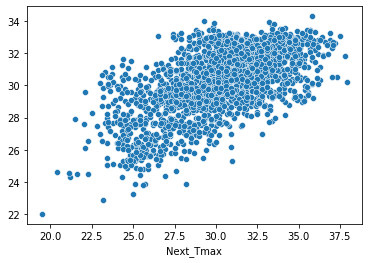

In [218]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

#### Random Forest

In [219]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [220]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([32.325, 32.884, 30.244, ..., 28.934, 29.289, 32.494])

In [221]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.257262348929558

In [222]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9737831179958716

In [223]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([29.834, 31.105, 34.959, ..., 32.162, 28.328, 32.149])

In [224]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

1.607187185914035

In [225]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8321945862021195

<AxesSubplot:xlabel='Next_Tmax'>

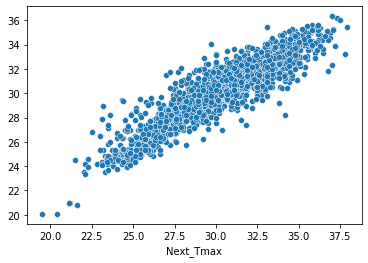

In [226]:
sns.scatterplot(x=y_test,y=y_test_pred)

The random forest regressor has better R2 score then Linear regression model.
But in Random forest model as we can see the train R2 score is 97% but the test R2 score is 83%, this means model is overfitting.

#### Hyperparameter tuning

In [254]:
param_grid = {
    'bootstrap': [True],
    #'max_depth': [25, 30, 35],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["auto"],
    #'n_estimators': [300, 400, 500]
    'n_estimators': [100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [255]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 1/5; 1/9] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.786 total time=   5.8s
[CV 2/5; 1/9] START bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 2/5; 1/9] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.789 total time=   6.1s
[CV 3/5; 1/9] START bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 3/5; 1/9] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.788 total time=   5.8s
[CV 4/5; 1/9] START bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 4/5; 1/9] END bootstrap=True, max_features=auto, min

[CV 3/5; 7/9] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.774 total time=   5.3s
[CV 4/5; 7/9] START bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100
[CV 4/5; 7/9] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.801 total time=   5.2s
[CV 5/5; 7/9] START bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100
[CV 5/5; 7/9] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.799 total time=   5.3s
[CV 1/5; 8/9] START bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 1/5; 8/9] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   4.7s
[CV 2/5; 8/9] START bootstrap=True, max_features=auto, min_samples_leaf=3, min_sample

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [100]},
             verbose=10)

In [256]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [257]:
#Fit the random forest classifier model
rf=RandomForestRegressor(**best_params)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=3)

In [258]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([32.5211    , 32.87136667, 30.37478333, ..., 28.34286667,
       29.36991667, 32.40102381])

In [259]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.27226356239846783

In [260]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9722543865469457

In [261]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([30.01865   , 31.15185   , 35.08108333, ..., 32.02534286,
       28.11125   , 31.85863571])

In [262]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

1.5956246272920962

In [263]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8334018257515148

<AxesSubplot:xlabel='Next_Tmax'>

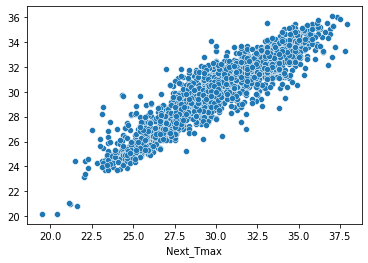

In [264]:
sns.scatterplot(x=y_test,y=y_test_pred)

After hyperparameter tuning there isn't much change in the train and test R2 score.

In [266]:
# Saving the best model
pickle.dump(rf, open('model_temperature_forecast_next_max.pkl', 'wb'))

### ModelBuilding (Target Variable- Next_Tmin)

In [267]:
X

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
0,-0.127705,0.208725,-0.515449,-0.628695,-0.664909,-0.306878,-0.277399,-0.241582,-0.225506,2.769916,1.113817,-0.482333
1,-0.648272,-0.314039,-0.547790,-0.637752,-0.677569,-0.306878,-0.277399,-0.241582,-0.225506,-0.315833,-0.543011,-0.482333
2,-0.442107,-1.250196,-0.609736,-0.458268,-0.620624,-0.306878,-0.277399,-0.241582,-0.225506,-0.526781,-0.723950,-0.482333
3,-0.667598,0.097552,-0.582802,-0.630864,-0.651776,-0.306878,-0.277399,-0.241582,-0.225506,-0.298273,0.931274,-0.482333
4,-0.628357,1.358274,-0.831762,-0.559569,-0.510293,-0.306878,-0.277399,-0.241582,-0.225506,-0.494902,-0.549286,-0.482333
...,...,...,...,...,...,...,...,...,...,...,...,...
7718,-0.227307,-1.577297,-1.209253,-1.278720,-1.165419,-0.306878,-0.277399,-0.241582,-0.225506,-0.655844,-0.500695,0.411180
7719,-0.613078,0.587640,-1.157292,-1.278718,-1.112825,-0.306878,-0.277399,-0.241582,-0.225506,-0.735600,-0.820913,0.411180
7720,-0.437168,0.286523,-1.296888,-1.278720,-1.182742,-0.306878,-0.277399,-0.241582,-0.225506,-0.853069,-0.804716,0.411180
7721,-0.255222,-0.454204,-1.274509,-1.278720,-1.182742,-0.306878,-0.277399,-0.241582,-0.225506,-0.821617,-0.755906,0.411180


In [268]:
y=df['Next_Tmin']
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7718    17.7
7719    17.1
7720    18.1
7721    18.8
7722    17.4
Name: Next_Tmin, Length: 7723, dtype: float64

In [269]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [270]:
X_train

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
4834,-1.034749,0.233393,-0.903179,-1.047611,-1.125657,-0.306878,-0.277399,-0.241582,-0.225506,-0.735600,-0.820913,-0.035576
1775,0.985930,3.669378,0.476010,-1.184648,-1.125814,-0.151274,-0.277399,-0.241582,-0.225506,-0.298273,0.931274,0.857937
3031,-1.058611,-0.278055,-1.203564,-0.257141,-0.235191,-0.306878,-0.277399,-0.241582,-0.220085,-0.611612,-0.463340,0.411180
1588,-0.546128,1.014536,0.054376,0.419298,1.320912,-0.306878,-0.277399,-0.222676,-0.062772,-0.155465,-0.409569,-2.716116
2749,1.351030,0.001063,0.993014,1.479862,2.270260,-0.148715,0.120035,-0.095934,3.405685,-0.298273,0.931274,0.411180
...,...,...,...,...,...,...,...,...,...,...,...,...
522,1.116324,-0.349405,1.317242,1.367067,0.846595,-0.300917,-0.120693,-0.166945,-0.225506,-0.853069,-0.804716,-0.035576
2259,-0.525111,-0.848696,1.690317,0.011415,-0.996682,-0.295841,-0.276531,-0.241582,-0.225506,-0.038328,1.041953,-0.035576
2982,-0.310844,-0.998989,-1.037053,0.200090,0.200762,-0.306878,-0.277399,-0.241582,-0.221355,1.292768,-0.485374,0.411180
5308,0.126558,-0.433690,0.443723,2.433497,0.953661,-0.305875,0.594948,1.094446,-0.030244,-0.655844,-0.500695,-0.035576


In [271]:
X_test

,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,month
4317,-1.306119,0.446932,-0.685132,0.936531,1.493790,-0.306878,-0.277399,-0.241582,-0.225506,-0.494902,-0.549286,0.411180
766,-0.298805,2.003172,1.585951,-0.627141,-0.804850,1.200014,-0.277399,-0.241582,-0.225506,-0.155465,-0.409569,-0.035576
7066,-0.685190,-0.069080,-1.233799,-0.926656,-0.924101,-0.306878,-0.277399,-0.241582,-0.225506,-0.611612,-0.463340,-1.375846
574,1.336019,-0.845993,1.370881,0.930446,1.054005,-0.297970,1.018600,-0.241582,-0.225506,-0.779470,-0.720156,-0.035576
2650,-1.423130,-0.070277,1.169583,0.869521,0.439237,0.327031,-0.277399,-0.241582,-0.225492,-0.494902,-0.549286,0.411180
...,...,...,...,...,...,...,...,...,...,...,...,...
7708,-0.491467,-0.536519,-1.144960,-1.278695,-1.148451,-0.306878,-0.277399,-0.241582,-0.225506,-0.611612,-0.463340,0.411180
6592,-0.240433,-0.811757,0.168625,0.603670,0.525111,-0.306878,-0.277399,-0.241582,-0.225506,-0.611612,-0.463340,-0.035576
7219,0.096078,-0.532848,-0.441156,-0.807332,-0.063876,-0.306878,-0.277399,0.561283,-0.225506,-0.569848,-0.467207,1.304694
6582,-0.063579,0.170670,0.098620,0.753573,0.768828,-0.306878,-0.277399,-0.241582,-0.225506,2.769916,1.113817,-0.035576


In [272]:
y_train

4834    21.9
1775    24.2
3031    21.1
1588    20.7
2749    20.5
        ... 
522     26.2
2259    23.0
2982    19.4
5308    26.6
1199    25.7
Name: Next_Tmin, Length: 5792, dtype: float64

In [273]:
y_test

4317    23.6
766     23.5
7066    26.5
574     24.8
2650    20.3
        ... 
7708    16.2
6592    23.8
7219    23.7
6582    21.9
1240    23.3
Name: Next_Tmin, Length: 1931, dtype: float64

#### Linear Regression

In [274]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [275]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([23.57711107, 23.11294126, 23.4715344 , ..., 21.73201483,
       23.2637049 , 22.77154962])

In [276]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

5.580167419344257

In [277]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.09429841351889534

In [278]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([22.9622443 , 22.96879128, 23.67331664, ..., 23.18937633,
       20.76050123, 23.50402437])

In [279]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

5.701315554881348

In [280]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.07714509879552922

<AxesSubplot:xlabel='Next_Tmin'>

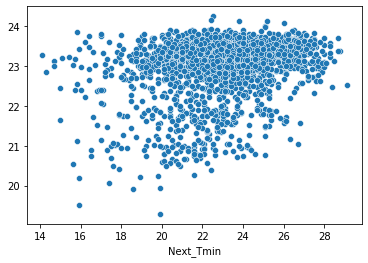

In [281]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

#### Random Forest

In [282]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [283]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([22.237, 24.327, 20.914, ..., 20.298, 26.129, 25.273])

In [284]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.339314747064917

In [285]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9449267590668016

In [286]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([22.9  , 23.011, 23.892, ..., 23.586, 21.471, 23.959])

In [287]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

2.2466930134645255

In [288]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.6363345198105371

<AxesSubplot:xlabel='Next_Tmin'>

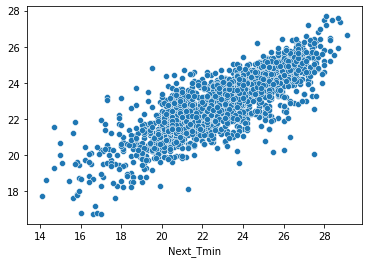

In [289]:
sns.scatterplot(x=y_test,y=y_test_pred)

The random forest regressor has better R2 score then Linear regression model. But in Random forest model as we can see the train R2 score is 94% but the test R2 score is 63%, this means model is overfitting.

#### Hyperparameter tuning

In [308]:
param_grid = {
    'bootstrap': [True],
    #'max_depth': [30, 32, 34],
    'max_depth': [30, 40, 50],
    #'min_samples_split': [3, 4, 5],
    'min_samples_split': [4],
    #'min_samples_leaf': [1, 2, 3],
    'min_samples_leaf': [1],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["auto"],
    #'n_estimators': [100, 150, 200]
    'n_estimators': [100, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [309]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 1/6] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.582 total time=   1.8s
[CV 2/5; 1/6] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 2/5; 1/6] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.562 total time=   2.1s
[CV 3/5; 1/6] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 1/6] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.599 total time=   2.1s
[CV 4/5; 1/6] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf

[CV 5/5; 6/6] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.574 total time=   3.7s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 40, 50],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [4], 'n_estimators': [100, 150]},
             verbose=10)

In [310]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [311]:
#Fit the random forest classifier model
rf=RandomForestRegressor(**best_params)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_split=4)

In [312]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([22.22459286, 24.52180476, 20.56813175, ..., 20.34388571,
       26.11240604, 25.33055238])

In [313]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.4102549884917122

In [314]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9334126440990556

In [315]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([22.81977738, 23.40390238, 23.80074048, ..., 23.92972788,
       21.8135631 , 23.95038571])

In [316]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

2.287236885476528

In [317]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.6297718044793276

<AxesSubplot:xlabel='Next_Tmin'>

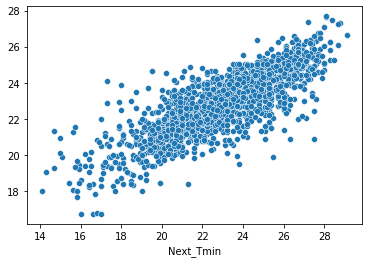

In [318]:
sns.scatterplot(x=y_test,y=y_test_pred)

##### After hyperparameter tuning there isn't much change in the test R2 score.

In [319]:
# Saving the best model
pickle.dump(rf, open('model_temperature_forecast_next_min.pkl', 'wb'))